Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
Columns: Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest

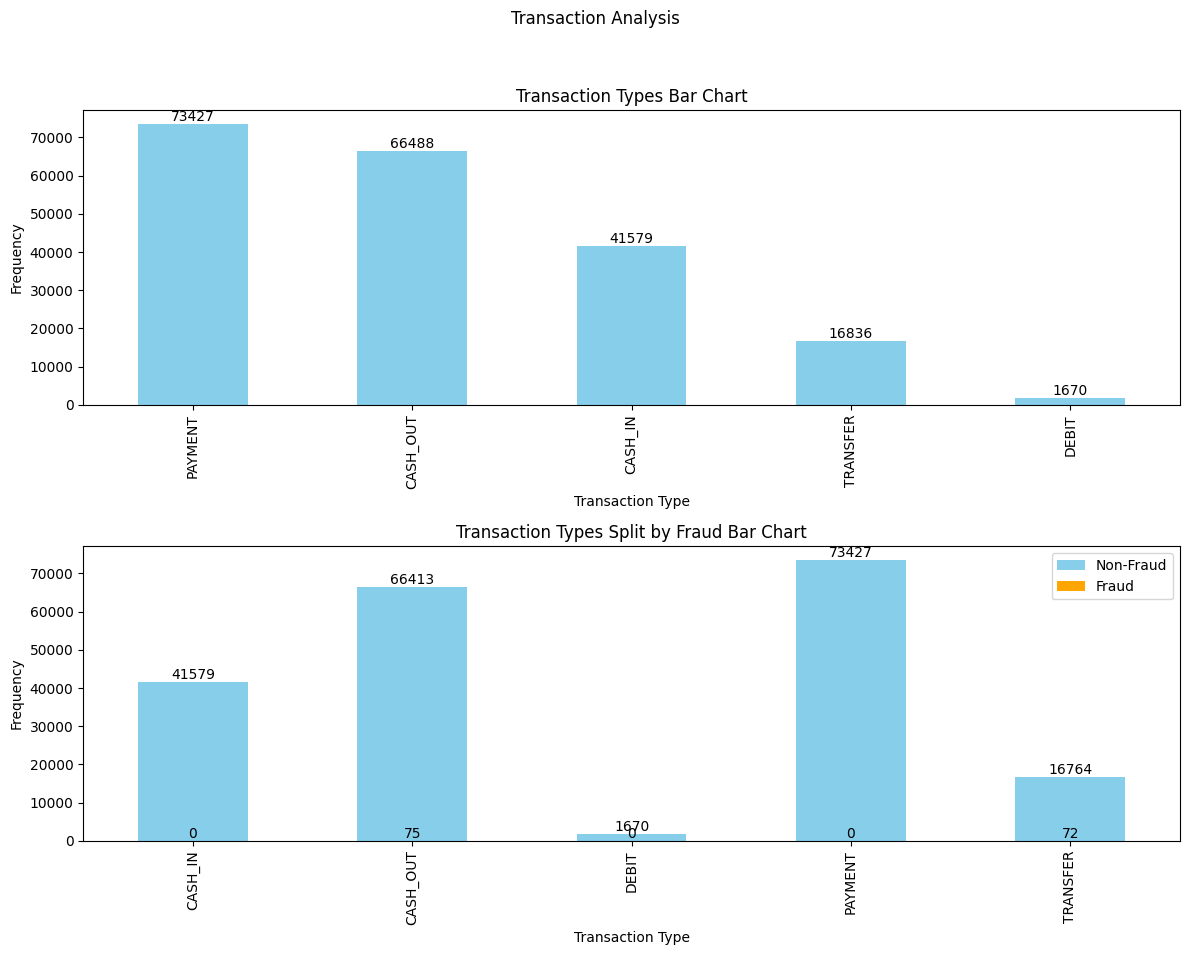

The scatter plot visualizes the relationship between the origin and destination account balance delta for cash out transactions, with distinct colors for fraud (red) and non-fraud (blue) transactions. This helps in identifying patterns or anomalies.


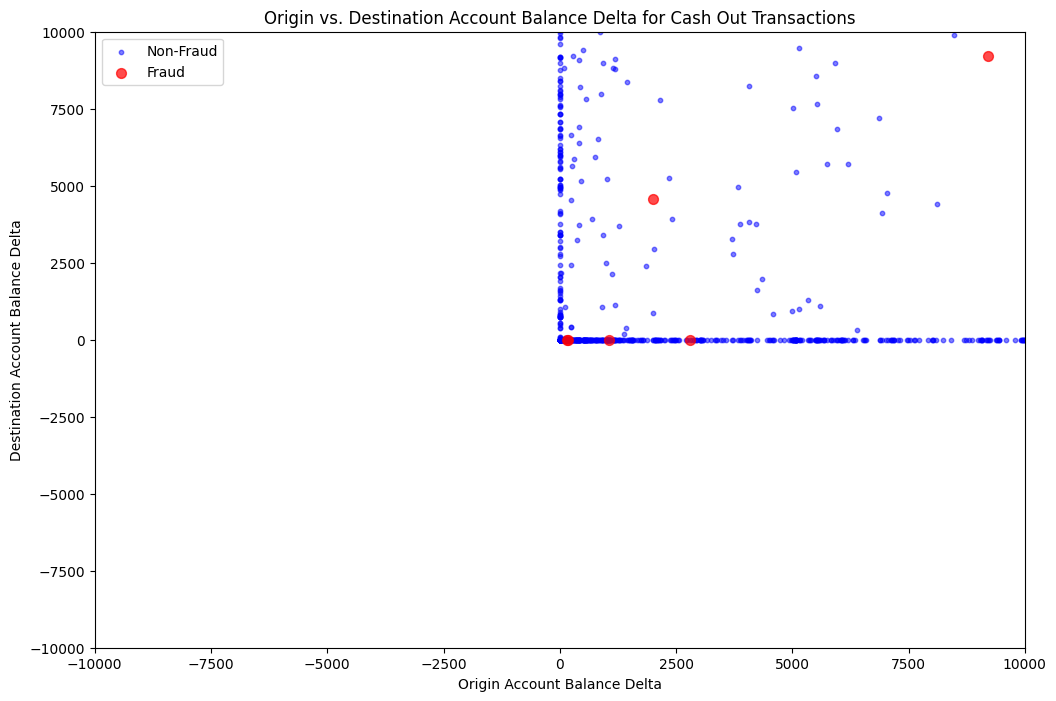

count    2.000000e+05
mean     1.808112e+05
std      3.291800e+05
min      3.200000e-01
25%      1.201612e+04
50%      6.872104e+04
75%      2.290791e+05
max      1.000000e+07
Name: amount, dtype: float64
The histogram displays the distribution of transaction amounts. This visualization helps understand the spread and common ranges of transaction amounts in the dataset.


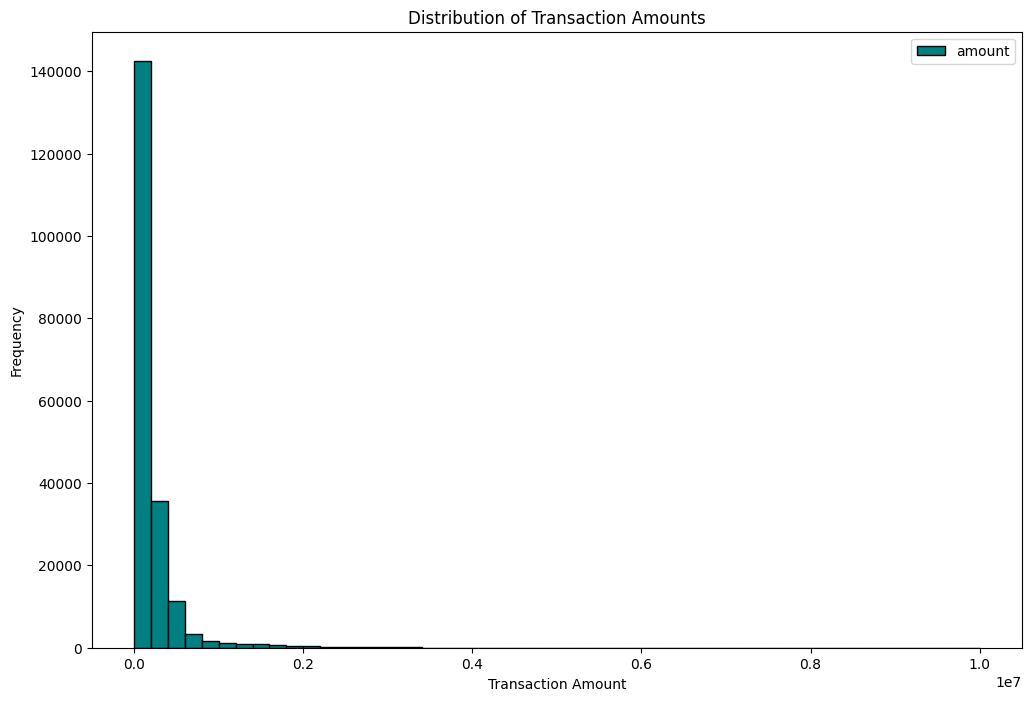

In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    df = pd.read_csv(file)
    print(df.head())
    print("Columns:", df.columns)  # Debug print to show column names
    return df

def exercise_1(df):
    if hasattr(df, 'columns'):
        return df.columns.tolist()
    else:
        raise ValueError("Input is not a DataFrame")

def exercise_2(df, k):
    if isinstance(df, pd.DataFrame) and isinstance(k, int) and k > 0:
        return df.head(k)
    else:
        raise ValueError("Invalid input: df must be a DataFrame and k must be a positive integer.")

def exercise_3(df, k):
    if isinstance(df, pd.DataFrame) and isinstance(k, int) and k > 0:
        return df.sample(n=k)
    else:
        raise ValueError("Invalid input: df must be a DataFrame and k must be a positive integer.")

def exercise_4(df):
    if isinstance(df, pd.DataFrame):
        if 'type' in df.columns:
            unique_types = df['type'].unique().tolist()
            return unique_types
        else:
            raise ValueError("Column 'type' does not exist in the DataFrame.")
    else:
        raise ValueError("Input is not a DataFrame")

def exercise_5(df):
    if isinstance(df, pd.DataFrame):
        if 'nameDest' in df.columns:
            destination_counts = df['nameDest'].value_counts()
            top_10_destinations = destination_counts.head(10)
            return top_10_destinations
        else:
            raise ValueError("Column 'nameDest' does not exist in the DataFrame.")
    else:
        raise ValueError("Input is not a DataFrame")

def exercise_6(df):
    if isinstance(df, pd.DataFrame):
        if 'isFraud' in df.columns:
            fraud_rows = df[df['isFraud'] == 1]
            return fraud_rows
        else:
            raise ValueError("Column 'isFraud' does not exist in the DataFrame.")
    else:
        raise ValueError("Input is not a DataFrame")

def exercise_7(df):
    if isinstance(df, pd.DataFrame):
        if 'nameOrig' in df.columns and 'nameDest' in df.columns:
            distinct_destinations = df.groupby('nameOrig')['nameDest'].nunique()
            distinct_destinations_df = distinct_destinations.reset_index(name='distinct_destinations')
            distinct_destinations_df = distinct_destinations_df.sort_values(by='distinct_destinations', ascending=False)
            return distinct_destinations_df
        else:
            raise ValueError("Columns 'nameOrig' or 'nameDest' do not exist in the DataFrame.")
    else:
        raise ValueError("Input is not a DataFrame")

def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()

    def transaction_counts_split_by_fraud(df):
        if 'type' not in df.columns or 'isFraud' not in df.columns:
            raise ValueError("Required columns are missing.")
        counts = df.groupby(['type', 'isFraud']).size().unstack().fillna(0)
        counts.columns = ['Non-Fraud', 'Fraud']
        return counts

    fig, axs = plt.subplots(2, figsize=(12, 10))
    
    # Plot the first bar chart: Transaction Types
    transaction_counts(df).plot(ax=axs[0], kind='bar', color='skyblue')
    axs[0].set_title('Transaction Types Bar Chart')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Frequency')
    
    # Plot the second bar chart: Transaction Types Split by Fraud
    transaction_split = transaction_counts_split_by_fraud(df)
    transaction_split.plot(ax=axs[1], kind='bar', stacked=True, color=['skyblue', 'orange'])
    axs[1].set_title('Transaction Types Split by Fraud Bar Chart')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Frequency')
    
    fig.suptitle('Transaction Analysis')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    for ax in axs:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom')

    return ('The first chart displays the frequency of each transaction type. '
            'The second chart shows the breakdown of transaction types by fraud status, '
            'with colors indicating non-fraud (skyblue) and fraud (orange) occurrences.')

def visual_2(df):
    def query(df):
        if 'type' not in df.columns or 'oldbalanceOrg' not in df.columns or 'newbalanceDest' not in df.columns:
            raise ValueError("Required columns are missing.")
        cash_out_transactions = df[df['type'] == 'CASH_OUT']
        if cash_out_transactions.empty:
            raise ValueError("No CASH_OUT transactions found.")
        return cash_out_transactions[['oldbalanceOrg', 'newbalanceDest', 'isFraud']]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    scatter_data = query(df)
    
    # Plotting with different colors for fraud and non-fraud transactions
    scatter_data[scatter_data['isFraud'] == 0].plot.scatter(x='oldbalanceOrg', y='newbalanceDest', ax=ax, color='blue', alpha=0.5, label='Non-Fraud', s=10)
    scatter_data[scatter_data['isFraud'] == 1].plot.scatter(x='oldbalanceOrg', y='newbalanceDest', ax=ax, color='red', alpha=0.7, label='Fraud', s=50)
    
    ax.set_title('Origin vs. Destination Account Balance Delta for Cash Out Transactions')
    ax.set_xlabel('Origin Account Balance Delta')
    ax.set_ylabel('Destination Account Balance Delta')
    ax.set_xlim(left=-1e4, right=1e4)
    ax.set_ylim(bottom=-1e4, top=1e4)
    ax.legend()
    
    return ('The scatter plot visualizes the relationship between the origin and destination account balance '
            'delta for cash out transactions, with distinct colors for fraud (red) and non-fraud (blue) transactions. '
            'This helps in identifying patterns or anomalies.')

def exercise_custom(df):
    return df['amount'].describe()

def visual_custom(df):
    def query(df):
        return df[['amount']]

    fig, ax = plt.subplots(figsize=(12, 8))
    df_amounts = query(df)
    df_amounts.plot.hist(bins=50, edgecolor='black', ax=ax, color='teal')
    ax.set_title('Distribution of Transaction Amounts')
    ax.set_xlabel('Transaction Amount')
    ax.set_ylabel('Frequency')

    return ('The histogram displays the distribution of transaction amounts. '
            'This visualization helps understand the spread and common ranges of transaction amounts in the dataset.')

if __name__ == "__main__":
    df = exercise_0('transactions.csv')
    column_names = exercise_1(df)
    print("Column names:", column_names)
    
    k = 5
    first_k_rows = exercise_2(df, k)
    print(f"First {k} rows of the DataFrame:\n", first_k_rows)
    
    random_sample = exercise_3(df, k)
    print(f"Random sample of {k} rows from the DataFrame:\n", random_sample)
    
    unique_transaction_types = exercise_4(df)
    print("Unique transaction types:", unique_transaction_types)
    
    top_10_destinations = exercise_5(df)
    print("Top 10 transaction destinations with frequencies:\n", top_10_destinations)
    
    fraud_rows = exercise_6(df)
    print("Rows where fraud was detected:\n", fraud_rows)
    
    distinct_destinations_df = exercise_7(df)
    print("Number of distinct destinations each source has interacted with, sorted in descending order:\n", distinct_destinations_df)
    
    print(visual_1(df))
    plt.show()  # Display the plots for visual_1
    
    print(visual_2(df))
    plt.show()  # Display the scatter plot for visual_2
    
    print(exercise_custom(df))
    print(visual_custom(df))
    plt.show()  # Display the histogram for visual_custom
